In [7]:
# Importing libraries

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import matplotlib
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from itertools import cycle
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# Uploading Data

train = '/content/drive/MyDrive/UNSW_2018_IoT_Botnet_Final_10_best_Training.csv'
train = pd.read_csv(train)

test = '/content/drive/MyDrive/UNSW_2018_IoT_Botnet_Final_10_best_Testing.csv'
test = pd.read_csv(test)

In [11]:
train.head()

test.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,792371,udp,192.168.100.150,48516,192.168.100.3,80,175094,0.226784,100,4.100436,4,4.457383,100,0.000000,0.404711,4.719438,1,DoS,UDP
1,2056418,tcp,192.168.100.148,22267,192.168.100.3,80,143024,0.451998,100,3.439257,1,3.806172,100,0.225077,0.401397,4.442930,1,DDoS,TCP
2,2795650,udp,192.168.100.149,28629,192.168.100.3,80,167033,1.931553,73,0.000000,4,2.731204,100,0.000000,0.407287,4.138455,1,DDoS,UDP
3,2118009,tcp,192.168.100.148,42142,192.168.100.3,80,204615,0.428798,56,3.271411,1,3.626428,100,0.000000,0.343654,4.229700,1,DDoS,TCP
4,303688,tcp,192.168.100.149,1645,192.168.100.5,80,40058,2.058381,100,0.000000,3,1.188407,100,0.000000,0.135842,4.753628,1,DoS,TCP


In [12]:
# Looking for null values in test data

test.isnull().sum()

pkSeqID              0
proto                0
saddr                0
sport                0
daddr                0
dport                0
seq                  0
stddev               0
N_IN_Conn_P_SrcIP    0
min                  0
state_number         0
mean                 0
N_IN_Conn_P_DstIP    0
drate                0
srate                0
max                  0
attack               0
category             0
subcategory          0
dtype: int64

In [13]:
# Dropping pkSeqID and seq because they're identifying
# rows for which we have ip addresses. Dropping 
# subcategory because we are already dealing with the column 'category'.

train.drop(["pkSeqID","seq","subcategory"], axis=1, inplace=True)
test.drop(["pkSeqID","seq","subcategory"], axis=1, inplace=True)
train.dtypes[train.dtypes=='object']

drop_theft = train[train['category']=='Theft'].index
train.drop(drop_theft , inplace=True)

drop_theft = test[test['category']=='Theft'].index
test.drop(drop_theft , inplace=True)

In [14]:
# Finding the number of the string '0x' in the column'sport

search_string='0x'
result = set([i for i in train['sport'] if i.startswith(search_string)])
result

{'0x0008', '0x000d', '0x0011', '0x0303'}

In [15]:
# Replacing the string '0x' with relevant numbers from the data

train['sport']=train['sport'].replace(['0x0303'],'771') 
train['sport']=train['sport'].replace(['0x0011'],'17')
train['sport']=train['sport'].replace(['0x000d'],'13')
train['sport']=train['sport'].replace(['0x0008'],'8')


In [16]:
# Converting the cell values into integer

train["sport"] = train["sport"].astype(str).astype(int)

In [17]:
# Finding the number of the string '0x' in the column'dport'

search_string='0x'
result = set([i for i in train['dport'] if i.startswith(search_string)])
print(len(result))
result

1062


{'0xf403',
 '0xae4b',
 '0x6d06',
 '0x5ca1',
 '0x4854',
 '0x0d04',
 '0x8800',
 '0xba13',
 '0xec46',
 '0x2440',
 '0x8259',
 '0xc544',
 '0x79a0',
 '0xd796',
 '0xd752',
 '0x3d03',
 '0x0945',
 '0xae08',
 '0x2909',
 '0x0f44',
 '0x310c',
 '0x7b00',
 '0xba43',
 '0xf4b6',
 '0x6e8a',
 '0xae9e',
 '0xb102',
 '0x1700',
 '0xca63',
 '0x62d3',
 '0x0e4a',
 '0x5084',
 '0xab02',
 '0xd75e',
 '0xcebb',
 '0x442c',
 '0xc413',
 '0x4c04',
 '0x0403',
 '0x2e04',
 '0x2f44',
 '0x5190',
 '0xc547',
 '0xce4c',
 '0x9154',
 '0xcb18',
 '0xe977',
 '0xbba8',
 '0x9c4f',
 '0xc342',
 '0x5fc1',
 '0x0f59',
 '0xaf52',
 '0x18c0',
 '0xa146',
 '0x56a8',
 '0x0300',
 '0xe603',
 '0x0a54',
 '0x3199',
 '0xc5ae',
 '0xe24c',
 '0x2a04',
 '0x2855',
 '0x3447',
 '0xa140',
 '0x7740',
 '0x6296',
 '0x6e59',
 '0x11c0',
 '0x7fbc',
 '0xfc03',
 '0x3cc0',
 '0xad02',
 '0x8c54',
 '0x8769',
 '0xb201',
 '0x1407',
 '0x6e8d',
 '0xb847',
 '0xc75d',
 '0x9411',
 '0xb100',
 '0x2ae4',
 '0x29c0',
 '0x1240',
 '0x1d04',
 '0x6027',
 '0xb606',
 '0x9526',
 '0xea48',

In [18]:
# Converting the values consisted with '0x' into integer

train['dport']=train.dport.apply(lambda x: int(x,16) if len(x)>1 and x[1]=="x" else int(x))

# Counting the number of values in 'dport'

train['dport'].value_counts()

 80       2858794
 1           5379
 3306        3757
 53           275
-1            163
           ...   
 40064          1
 40027          1
 40344          1
 3754           1
 61804          1
Name: dport, Length: 6778, dtype: int64

In [19]:
# Replacing the string '0x' in test data with relevant
# values in the column

test['sport']=test['sport'].replace(['0x0303'],'771') 
test['sport']=test['sport'].replace(['0x0011'],'17')
test['sport']=test['sport'].replace(['0x000d'],'13')
test['sport']=test['sport'].replace(['0x0008'],'8')

In [20]:
# Replacing the string '0x' in test data with relevant values in the column

test["sport"] = test["sport"].astype(str).astype(int)

In [21]:
# Replacing the string '0x' in test data with relevant values in the column

test['dport'] = test.dport.apply(lambda x: int(x,16) if len(x)>1 and x[1]=="x" else int(x))

In [22]:
# Performing label encoding in train and test data

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train["saddr_enc"]= le.fit_transform(train.saddr)
train["daddr_enc"]= le.fit_transform(train.daddr)
train["proto_enc"]= le.fit_transform(train.proto)
train["category_enc"]= le.fit_transform(train.category)
train.drop(['saddr','daddr','proto','category'], axis=1, inplace=True)

In [23]:
# Performing label encoding in train and test data

test["saddr_enc"]= le.fit_transform(test.saddr)
test["daddr_enc"]= le.fit_transform(test.daddr)
test["proto_enc"]= le.fit_transform(test.proto)
test["category_enc"]= le.fit_transform(test.category)
test.drop(['saddr','daddr','proto','category'], axis=1, inplace=True)

In [24]:
# Assigning target column into y_train and y_test

y_train=train["category_enc"]
y_test=test["category_enc"]

In [25]:
# Standardizing and separting feature columns from train and test data

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
features = train.iloc[:,:-1]
cols=features.columns
scaled_features= scaler.fit_transform(features)
train= pd.DataFrame(scaled_features,columns=cols)

features = test.iloc[:,:-1]
cols=features.columns
scaled_features= scaler.fit_transform(features)
test= pd.DataFrame(scaled_features,columns=cols)

In [26]:
pd.Series(y_test).value_counts()

0    385309
1    330112
3     18163
2       107
Name: category_enc, dtype: int64

In [27]:
pd.Series(y_train).value_counts()

0    1541315
1    1320148
3      72919
2        370
Name: category_enc, dtype: int64

In [28]:
# Balancing the dataset by over and under sampling

from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.svm import SVC
import imblearn
from imblearn.over_sampling import RandomOverSampler
samp_strat= { 0 : 1541315, 1 : 1320148, 2 : 72919, 3 : 72919}
random_over= RandomOverSampler(sampling_strategy=samp_strat,random_state=1)
Xres,yres = random_over.fit_resample(train,y_train)

from imblearn.under_sampling import RandomUnderSampler
samp_strat= { 0 : 72919, 1 : 72919, 2 : 72919, 3 : 72919}
random_under= RandomUnderSampler(sampling_strategy=samp_strat,random_state=1)
Xres1,yres1 = random_under.fit_resample(Xres,yres)

In [29]:
pd.Series(yres1).value_counts()

0    72919
1    72919
2    72919
3    72919
Name: category_enc, dtype: int64

In [30]:
#과다 샘플링 데이터 세트 균형 조정
import imblearn
from imblearn.under_sampling import RandomUnderSampler
samp_strat= { 0 : 385309, 1 : 330112, 2 : 330112, 3 : 330112}
random_over_1= RandomOverSampler(sampling_strategy=samp_strat,random_state=1)
test,y_test = random_over_1.fit_resample(test,y_test)

In [31]:
pd.Series(y_test).value_counts()

0    385309
1    330112
3    330112
2    330112
Name: category_enc, dtype: int64

In [32]:
#과소 샘플링 데이터 세트 균형 조정
import imblearn
from imblearn.under_sampling import RandomUnderSampler
samp_strat= { 0 : 14584, 1 : 14584, 2 : 14584, 3 : 14584}
random_over_2= RandomUnderSampler(sampling_strategy=samp_strat,random_state=1)
test,y_test = random_over_2.fit_resample(test,y_test)

In [33]:
pd.Series(y_test).value_counts()

0    14584
1    14584
2    14584
3    14584
Name: category_enc, dtype: int64

In [34]:
# Model overview

model = SVC(kernel='linear',probability=True,random_state=7)

In [35]:
# Training the model

model.fit(Xres1,yres1)

SVC(kernel='linear', probability=True, random_state=7)

In [36]:
# Finding out the test accuracy

score = model.score(test,y_test)
score


0.9864920460778935

In [37]:
# Finding out the classification report

from sklearn.metrics import classification_report,confusion_matrix
prediction = model.predict(test)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     14584
           1       0.97      1.00      0.98     14584
           2       1.00      1.00      1.00     14584
           3       0.99      0.97      0.98     14584

    accuracy                           0.99     58336
   macro avg       0.99      0.99      0.99     58336
weighted avg       0.99      0.99      0.99     58336



In [38]:
# Defining function for plotting the confusion matrix

def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.
    """
    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    
    ax.set_xlabel('Predicted Label') 
    ax.set_ylabel('True Label')
    
    return im, cbar

def annotate_heatmap(im, data=None, fmt="d", threshold=None):
    """
    A function to annotate a heatmap.
    """
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, format(data[i, j], fmt), horizontalalignment="center",
                                 color="white" if data[i, j] > thresh else "black")
            texts.append(text)
        
        return texts

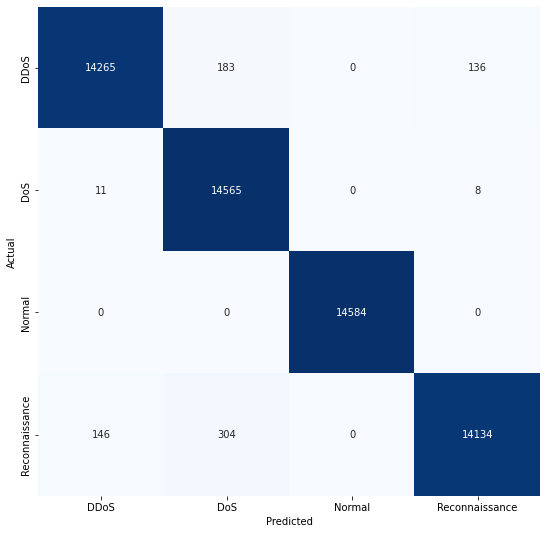

In [39]:
# Plotting the confusion matrix

labels = ['DDoS', 'DoS', 'Normal', 'Reconnaissance']
cm=confusion_matrix(y_test,prediction)

import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
#예측
plt.xlabel('Predicted')
#실제
plt.ylabel('Actual')
plt.savefig('Confusion Matrix.png')
plt.show()

In [40]:
from yellowbrick.classifier import ROCAUC

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


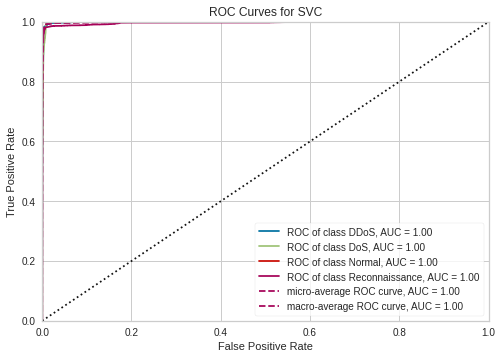

In [41]:
visualizer = ROCAUC(model, classes=["DDoS", "DoS", "Normal", "Reconnaissance"])
#training 데이터 훈련
visualizer.fit(Xres1, yres1)        
#training 모델 평가
visualizer.score(test, y_test)      
visualizer.show()  

In [42]:
# Finding the class probabilities

y_pred_proba=model.predict_proba(test)

In [43]:
# Finding out the auc score

from sklearn.metrics import roc_auc_score
auc=roc_auc_score(y_test,y_pred_proba,multi_class="ovr")

auc

0.9985410141144117

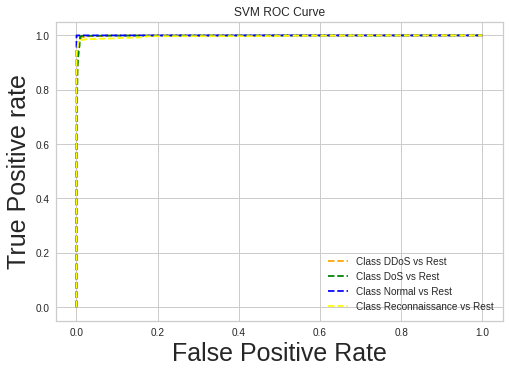

In [44]:
# Plotting the roc curve

fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class DDoS vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class DoS vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class Normal vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class Reconnaissance vs Rest')
plt.title('SVM ROC Curve')
plt.xlabel('False Positive Rate',fontsize=25)
plt.ylabel('True Positive rate',fontsize=25)
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 